In [676]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [677]:
df=pd.read_csv('Salary_Survey.csv')

EDA process

In [679]:
df.head()

,Timestamp,How old are you?,What industry do you work in?,Job title,"If your job title needs additional context, please clarify here:","What is your annual salary? (You'll indicate the currency in a later question. If you are part-time or hourly, please enter an annualized equivalent -- what you would earn if you worked the job 40 hours a week, 52 weeks a year.)","How much additional monetary compensation do you get, if any (for example, bonuses or overtime in an average year)? Please only include monetary compensation here, not the value of benefits.",Please indicate the currency,"If ""Other,"" please indicate the currency here:","If your income needs additional context, please provide it here:",...,How many years of professional work experience do you have overall?,How many years of professional work experience do you have in your field?,What is your highest level of education completed?,What is your gender?,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22
0,4/27/2021 11:02:10,25-34,Education (Higher Education),Research and Instruction Librarian,NaN,"55,000",0.0,USD,NaN,NaN,...,5-7 years,5-7 years,Master's degree,Woman,NaN,NaN,NaN,NaN,NaN,NaN
1,4/27/2021 11:02:22,25-34,Computing or Tech,Change & Internal Communications Manager,NaN,"54,600",4000.0,GBP,NaN,NaN,...,8 - 10 years,5-7 years,College degree,Non-binary,NaN,NaN,NaN,NaN,NaN,NaN
2,4/27/2021 11:02:38,25-34,"Accounting, Banking & Finance",Marketing Specialist,NaN,"34,000",NaN,USD,NaN,NaN,...,2 - 4 years,2 - 4 years,College degree,Woman,NaN,NaN,NaN,NaN,NaN,NaN
3,4/27/2021 11:02:41,25-34,Nonprofits,Program Manager,NaN,"62,000",3000.0,USD,NaN,NaN,...,8 - 10 years,5-7 years,College degree,Woman,NaN,NaN,NaN,NaN,NaN,NaN
4,4/27/2021 11:02:42,25-34,"Accounting, Banking & Finance",Accounting Manager,NaN,"60,000",7000.0,USD,NaN,NaN,...,8 - 10 years,5-7 years,College degree,Woman,NaN,NaN,NaN,NaN,NaN,NaN


In [680]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28178 entries, 0 to 28177
Data columns (total 23 columns):
 #   Column                                                                                                                                                                                                                                Non-Null Count  Dtype  
---  ------                                                                                                                                                                                                                                --------------  -----  
 0   Timestamp                                                                                                                                                                                                                             28085 non-null  object 
 1   How old are you?                                                                                             

In [681]:
# Dropping the features with no values
df=df.drop(columns=['Timestamp', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22'])

In [682]:
# Dropping oservations with no values
df.dropna(axis=0, how='all', inplace=True)

In [683]:
# Simplifying features names
df.columns = ['Age','Industry','Job_title','Additional_job_details','Annual_salary','Monetary_compensation','Currency','Other_Currency','Additional_income_details','Country_of_work','U.S._state_of_work','City_of_work','Years_of_experience','Years_of_experience_in_your_field','Level_of_education','Gender']

In [684]:
df.head()

,Age,Industry,Job_title,Additional_job_details,Annual_salary,Monetary_compensation,Currency,Other_Currency,Additional_income_details,Country_of_work,U.S._state_of_work,City_of_work,Years_of_experience,Years_of_experience_in_your_field,Level_of_education,Gender
0,25-34,Education (Higher Education),Research and Instruction Librarian,NaN,"55,000",0.0,USD,NaN,NaN,United States,Massachusetts,Boston,5-7 years,5-7 years,Master's degree,Woman
1,25-34,Computing or Tech,Change & Internal Communications Manager,NaN,"54,600",4000.0,GBP,NaN,NaN,United Kingdom,NaN,Cambridge,8 - 10 years,5-7 years,College degree,Non-binary
2,25-34,"Accounting, Banking & Finance",Marketing Specialist,NaN,"34,000",NaN,USD,NaN,NaN,US,Tennessee,Chattanooga,2 - 4 years,2 - 4 years,College degree,Woman
3,25-34,Nonprofits,Program Manager,NaN,"62,000",3000.0,USD,NaN,NaN,USA,Wisconsin,Milwaukee,8 - 10 years,5-7 years,College degree,Woman
4,25-34,"Accounting, Banking & Finance",Accounting Manager,NaN,"60,000",7000.0,USD,NaN,NaN,US,South Carolina,Greenville,8 - 10 years,5-7 years,College degree,Woman


In [685]:
# Dropping features with no relevant data to my final analysis
reduced_df = df.drop(columns=['Additional_job_details', 'Monetary_compensation', 'Other_Currency', 'Additional_income_details', 'U.S._state_of_work', 'City_of_work'])

In [686]:
# Count of the missing values
reduced_df.isnull().sum()

Age                                    0
Industry                              74
Job_title                              1
Annual_salary                          0
Currency                               0
Country_of_work                        0
Years_of_experience                    0
Years_of_experience_in_your_field      0
Level_of_education                   222
Gender                               171
dtype: int64

CLEANING THE DATA

In [688]:
# Checking data types
# Object is categorical data and some features in this dataset should be numerical data
reduced_df.dtypes

Age                                  object
Industry                             object
Job_title                            object
Annual_salary                        object
Currency                             object
Country_of_work                      object
Years_of_experience                  object
Years_of_experience_in_your_field    object
Level_of_education                   object
Gender                               object
dtype: object

In [689]:
# Checking for malformed values in all of the features
reduced_df["Age"].unique()

array(['25-34', '45-54', '35-44', '18-24', '65 or over', '55-64',
       'under 18'], dtype=object)

In [690]:
# Mapping age groups as midpoint numerical values
# Reference; Geeksforgeeks, https://www.geeksforgeeks.org/using-dictionary-to-remap-values-in-pandas-dataframe-columns/
# Reference: Stack Overflow, https://stackoverflow.com/questions/46432315/pandas-replace-column-values-by-dictionary-keys-if-they-are-in-dictionary-valu
age_category_mapping = {
    "under 18": 17,
    "18-24": 21,
    "25-34": 29,
    "35-44": 39,
    "45-54": 49,
    "55-64": 59,
    "65+": 65
}

In [691]:
reduced_df["Average_age"] = reduced_df["Age"].map(age_category_mapping)

In [692]:
reduced_df.drop(columns=["Age"], inplace=True)

In [693]:
print(reduced_df)

                                   Industry  \
0              Education (Higher Education)   
1                         Computing or Tech   
2             Accounting, Banking & Finance   
3                                Nonprofits   
4             Accounting, Banking & Finance   
...                                     ...   
28080         Accounting, Banking & Finance   
28081         Education (Primary/Secondary)   
28082  Government and Public Administration   
28083                     Computing or Tech   
28084                       Social networks   

                                      Job_title Annual_salary Currency  \
0            Research and Instruction Librarian        55,000      USD   
1      Change & Internal Communications Manager        54,600      GBP   
2                          Marketing Specialist        34,000      USD   
3                               Program Manager        62,000      USD   
4                            Accounting Manager        60,000    

In [694]:
reduced_df.dtypes

Industry                              object
Job_title                             object
Annual_salary                         object
Currency                              object
Country_of_work                       object
Years_of_experience                   object
Years_of_experience_in_your_field     object
Level_of_education                    object
Gender                                object
Average_age                          float64
dtype: object

In [695]:
reduced_df["Gender"].unique()

array(['Woman', 'Non-binary', 'Man', nan, 'Other or prefer not to answer',
       'Prefer not to answer'], dtype=object)

In [696]:
# Mapping other important features like Gender to get cleaner data for final analysis
gender_category_mapping = {
    "Man": "Male",
    "Woman": "Female",
    "Other or prefer not to answer": "Prefer not to answer",
    "Non-binary": "Non-binary",
}

In [697]:
reduced_df["Gender_category"] = reduced_df["Gender"].map(gender_category_mapping)

In [698]:
reduced_df.drop(columns=["Gender"], inplace=True)

In [699]:
print(reduced_df)

                                   Industry  \
0              Education (Higher Education)   
1                         Computing or Tech   
2             Accounting, Banking & Finance   
3                                Nonprofits   
4             Accounting, Banking & Finance   
...                                     ...   
28080         Accounting, Banking & Finance   
28081         Education (Primary/Secondary)   
28082  Government and Public Administration   
28083                     Computing or Tech   
28084                       Social networks   

                                      Job_title Annual_salary Currency  \
0            Research and Instruction Librarian        55,000      USD   
1      Change & Internal Communications Manager        54,600      GBP   
2                          Marketing Specialist        34,000      USD   
3                               Program Manager        62,000      USD   
4                            Accounting Manager        60,000    

In [700]:
reduced_df["Industry"].unique()

array(['Education (Higher Education)', 'Computing or Tech',
       'Accounting, Banking & Finance', ..., 'Student ', 'Wine & Spirits',
       'Social networks'], dtype=object)

In [701]:
reduced_df["Job_title"].unique()

array(['Research and Instruction Librarian',
       'Change & Internal Communications Manager', 'Marketing Specialist',
       ..., 'Curriculum Writer', 'Software Engineering Co-Op',
       'Content creator'], dtype=object)

In [702]:
reduced_df["Years_of_experience"].unique()

array(['5-7 years', '8 - 10 years', '2 - 4 years', '21 - 30 years',
       '11 - 20 years', '1 year or less', '41 years or more',
       '31 - 40 years'], dtype=object)

In [703]:
# Mapping Years_of_experience feature as midpoint values and converting to numerical
years_category_mapping = {
    "1 year or less": "1",
    "2 - 4 years": "3",
    "5-7 years": "6",
    "8 - 10 years": "9",
    "11 - 20 years": "15",
    "21 - 30 years": "25",
    "31 - 40 years": "35",
    "41 years or more": "41",
}

In [704]:
reduced_df["Average_Years_of_experience"] = reduced_df["Years_of_experience"].map(years_category_mapping)

In [705]:
reduced_df.drop(columns=["Years_of_experience"], inplace=True)

In [706]:
print(reduced_df)

                                   Industry  \
0              Education (Higher Education)   
1                         Computing or Tech   
2             Accounting, Banking & Finance   
3                                Nonprofits   
4             Accounting, Banking & Finance   
...                                     ...   
28080         Accounting, Banking & Finance   
28081         Education (Primary/Secondary)   
28082  Government and Public Administration   
28083                     Computing or Tech   
28084                       Social networks   

                                      Job_title Annual_salary Currency  \
0            Research and Instruction Librarian        55,000      USD   
1      Change & Internal Communications Manager        54,600      GBP   
2                          Marketing Specialist        34,000      USD   
3                               Program Manager        62,000      USD   
4                            Accounting Manager        60,000    

In [707]:
reduced_df.dtypes

Industry                              object
Job_title                             object
Annual_salary                         object
Currency                              object
Country_of_work                       object
Years_of_experience_in_your_field     object
Level_of_education                    object
Average_age                          float64
Gender_category                       object
Average_Years_of_experience           object
dtype: object

In [708]:
# Reference: Stack Overflow https://stackoverflow.com/questions/48094854/pandas-convert-data-type-from-object-to-float
# Converting to numerical values
reduced_df["Average_Years_of_experience"] = reduced_df["Average_Years_of_experience"].astype(float)

In [709]:
reduced_df.dtypes

Industry                              object
Job_title                             object
Annual_salary                         object
Currency                              object
Country_of_work                       object
Years_of_experience_in_your_field     object
Level_of_education                    object
Average_age                          float64
Gender_category                       object
Average_Years_of_experience          float64
dtype: object

In [710]:
reduced_df["Level_of_education"].unique()

array(["Master's degree", 'College degree', 'PhD', nan, 'Some college',
       'High School', 'Professional degree (MD, JD, etc.)'], dtype=object)

In [711]:
reduced_df["Country_of_work"].unique()

array(['United States', 'United Kingdom', 'US', 'USA', 'Canada',
       'United Kingdom ', 'usa', 'UK', 'Scotland ', 'U.S.',
       'United States ', 'The Netherlands', 'Australia ', 'Spain', 'us',
       'Usa', 'England', 'finland', 'United States of America', 'France',
       'United states', 'Scotland', 'USA ', 'United states ', 'Germany',
       'UK ', 'united states', 'Ireland', 'India', 'Australia', 'Uk',
       'United States of America ', 'U.S. ', 'canada', 'Canada ', 'U.S>',
       'ISA', 'Argentina', 'Great Britain ', 'US ', 'United State',
       'U.S.A', 'Denmark', 'U.S.A.', 'America', 'Netherlands',
       'netherlands', 'England ', 'united states of america', 'Ireland ',
       'Switzerland', 'Netherlands ', 'Bermuda', 'Us',
       'The United States', 'United State of America', 'Germany ',
       'Malaysia', 'Mexico ', 'United Stated', 'South Africa ', 'Belgium',
       'Northern Ireland', 'u.s.', 'South Africa', 'UNITED STATES',
       'united States', 'Sweden', 'Hong K

In [712]:
# Creating a malformed data and typos list and replacing it with coutry names or acronyms to get cleaner data in feauture Country_of_work
mvp_us=["USA", "United States", "usa", "us", "US", "US ", "United States ", "USA ", "united states", "U.S>", "U.S. ","United States of America ","United State","U.S.A","America","united states of america","Us","The United States","U.S.A.",'United Stated','United State of America','u.s.','UNITED STATES','united States','USA-- Virgin Islands','United Statws','U.S','Unites States ','Usa ','U.S.A. ','U. S. ','United Sates','United States of American ','Uniited States','Worldwide (based in US but short term trips aroudn the world)','United Sates of America','United States (I work from home and my clients are all over the US/Canada/PR','Unted States','United Statesp','United Stattes','United Statea','Unites States','United Statees','Uniyes States','UNited States','I am located in Canada but I work for a company in the US','Uniyed states','Uniyes States','United States of Americas','U. S.','United States of America','Usa','United states ','United states','US of A','United States of america ','U.SA','United Status',' U.S.','Puerto Rico ','Canada and USA','Virginia','U.s.','U.s.a.','USS','Uniteed States','Japan, US Gov position','United Stares','Us ','Unite States','The US','united states ','United states of America ','UnitedStates','UK for U.S. company','For the United States government, but posted overseas',' United States', 'United Statues', 'Untied States',
       'USA (company is based in a US territory, I work remote)','united stated',
       'United States Of America','USAB', 'Unitied States',"I work for an US based company but I'm from Argentina.",'Uniter Statez', 'U. S ','United Sttes','Unitef Stated','United states of America','San Francisco', 'Usat', '🇺🇸 ','United States of america','From Romania, but for an US based company','USA tomorrow ',
       'United Stateds','United states of america', 'UsA','United States of American', 'U.S.A ','USaa', 'uSA','US govt employee overseas, country withheld', 'usa ','uS','United Stares ','United STates','america','California ','United States is America','United States- Puerto Rico','United Statss','United  States','ISA',' US',
       'Unites states ','United statew',]
clean_reduced_df=reduced_df.replace(mvp_us, "U.S.")
# Specifying the column for which I want to change USD so it does not affect Currency feature
clean_reduced_df["Country_of_work"] = clean_reduced_df["Country_of_work"].replace("USD", "U.S.")

In [713]:
mvp_uk=['United Kingdom','United Kingdom ', 'UK', 'Scotland ','England','Scotland','UK ','Uk','Great Britain ','England ','Northern Ireland','England/UK','England, UK.','Britain ','United Kingdom (England)','United Kingdom.','United kingdom','United kingdom ','U.K. ','England, UK','uk','Jersey, Channel islands', 'Uk ','Great Britain','Hartford','UK (Northern Ireland)','United Kindom','Wales (United Kingdom)', 'England, Gb','Wales','Northern Ireland ', 'england','U.K. (northern England)', 'U.K','UK (England)', 'UK, remote',
       'Scotland, UK','Unites kingdom ','United Kingdomk','united kingdom','Austria, but I work remotely for a Dutch/British company','Wales, UK','England, United Kingdom','Englang','England, United Kingdom ','United y',
       'Wales (UK)', 'Isle of Man', 'Northern Ireland, United Kingdom','ENGLAND','London',]
clean_reduced_df=clean_reduced_df.replace(mvp_uk, "U.K.")

In [714]:
mvp_ca=['canada', 'Canada ','Canada, Ottawa, ontario','Can','CANADA ', 'Canadw','CANADA','Canda','Csnada','Canad','Canadá',]
clean_reduced_df=clean_reduced_df.replace(mvp_ca, "Canada")

In [715]:
mvp_nz=['New Zealand ','New Zealand Aotearoa', 'New zealand','NZ',' New Zealand','new zealand','Aotearoa New Zealand','New Zealand',]
clean_reduced_df=clean_reduced_df.replace(mvp_nz, "New_Zealand")  

In [716]:
mvp_aus=['Australia ','Australia','australia','Australi','Australian ',]
clean_reduced_df=clean_reduced_df.replace(mvp_aus, "Australia")

In [717]:
mvp_nl=['The Netherlands','netherlands','Netherlands ','The Netherlands ','NL','the Netherlands', 'Nederland','The netherlands','the netherlands',]
clean_reduced_df=clean_reduced_df.replace(mvp_nl, "Netherlands")

In [718]:
mvp_esp=['Spain','Spain ','Catalonia','spain',]
clean_reduced_df=clean_reduced_df.replace(mvp_esp, "Spain")

In [719]:
mvp_ie=['Ireland','Ireland ','ireland',]
clean_reduced_df=clean_reduced_df.replace(mvp_ie, "Ireland")

In [720]:
# Creating Other for non defined countries
mvp_other=['Contracts',"We don't get raises, we get quarterly bonuses, but they periodically asses income in the area you work, so I got a raise because a 3rd party assessment showed I was paid too little for the area we were located",'Global','Currently finance','UXZ','$2,175.84/year is deducted for benefits','IS','Remote','I.S.','bonus based on meeting yearly goals set w/ my supervisor',
       'International ',"I earn commission on sales. If I meet quota, I'm guaranteed another 16k min. Last year i earned an additional 27k. It's not uncommon for people in my space to earn 100k+ after commission. ",'Remote (philippines)','I was brought in on this salary to help with the EHR and very quickly was promoted to current position but compensation was not altered. ','n/a (remote from wherever I want)','From New Zealand but on projects across APAC', 'Y', 'europe',
       'UK, but for globally fully remote company',"USA, but for foreign gov't",'Policy','ss', 'dbfemf','LOUTRELAND','ff','Other','Africa',]
clean_reduced_df=clean_reduced_df.replace(mvp_other, "Other")

In [721]:
mvp_ger=['Germany','Germany ','germany','Company in Germany. I work from Pakistan.',]
clean_reduced_df=clean_reduced_df.replace(mvp_ger, "Germany")

In [722]:
mvp_jpn=['Japan', 'Japan ','japan',]
clean_reduced_df=clean_reduced_df.replace(mvp_jpn, "Japan")

In [723]:
mvp_ch=['Switzerland','SWITZERLAND','Switzerland ','switzerland',]
clean_reduced_df=clean_reduced_df.replace(mvp_ch, "Switzerland")

In [724]:
mvp_ind=['India','INDIA','ibdia',]
clean_reduced_df=clean_reduced_df.replace(mvp_ind, "India")

In [725]:
mvp_fr=['France','FRANCE','France ','france',]
clean_reduced_df=clean_reduced_df.replace(mvp_fr, "France")

In [726]:
mvp_den=['Denmark','Denmark ','Danmark','denmark','Denmark ',]
clean_reduced_df=clean_reduced_df.replace(mvp_den, "Denmark")

In [727]:
mvp_rsa=['South Africa ','South Africa','South africa',]
clean_reduced_df=clean_reduced_df.replace(mvp_rsa, "South Africa")

In [728]:
mvp_uae=['United Arab Emirates ','I work for a UAE-based organization, though I am personally in the US.',]
clean_reduced_df=clean_reduced_df.replace(mvp_uae, "UAE")   

In [729]:
mvp_mm=['Myanmar', 'Burma',]
clean_reduced_df=clean_reduced_df.replace(mvp_mm, "Myanmar") 

In [730]:
mvp_hkg=['Hong Kong','Hong Kong ','hong konh',]
clean_reduced_df=clean_reduced_df.replace(mvp_hkg, "Hong Kong")

In [731]:
mvp_chn=['China','Mainland China',]
clean_reduced_df=clean_reduced_df.replace(mvp_chn, "China") 

In [732]:
mvp_cz=['Czech republic','Czechia','czech republic','Czech Republic ','Czech Republic',]
clean_reduced_df=clean_reduced_df.replace(mvp_cz, "Czech Republic") 

In [733]:
mvp_ua=['U.A.','UA','Ukraine ',]
clean_reduced_df=clean_reduced_df.replace(mvp_ua, "Ukraine")

In [734]:
mvp_cro=['Croatia ','croatia',]
clean_reduced_df=clean_reduced_df.replace(mvp_cro, "Croatia")

In [735]:
mvp_sg=['Singapore','Singapore ','singapore',]
clean_reduced_df=clean_reduced_df.replace(mvp_sg, "Singapore")

In [736]:
mvp_th=['Thailand','ARGENTINA BUT MY ORG IS IN THAILAND',]
clean_reduced_df=clean_reduced_df.replace(mvp_th, "Thailand")

In [737]:
mvp_se=['Sweden','Sweden ',]
clean_reduced_df=clean_reduced_df.replace(mvp_se, "Sweden")

In [738]:
mvp_mx=['Mexico ','Mexico','México',]
clean_reduced_df=clean_reduced_df.replace(mvp_mx, "Mexico")

In [739]:
mvp_bra=['Brazil','Brazil ','Brasil',]
clean_reduced_df=clean_reduced_df.replace(mvp_bra, "Brazil")

In [740]:
mvp_lux=['Luxembourg','Luxemburg',]
clean_reduced_df=clean_reduced_df.replace(mvp_lux, "Luxemburg")

In [741]:
mvp_lk=['Sri lanka','Sri Lanka',]
clean_reduced_df=clean_reduced_df.replace(mvp_lk, "Sri Lanka")

In [742]:
mvp_fi=['Finland','finland',]
clean_reduced_df=clean_reduced_df.replace(mvp_fi, "Finland")

In [743]:
mvp_ita=['Italy (South)','Italy',]
clean_reduced_df=clean_reduced_df.replace(mvp_ita, "Italy")

In [744]:
mvp_pak=['Pakistan','pakistan',]
clean_reduced_df=clean_reduced_df.replace(mvp_pak, "Pakistan")

In [745]:
mvp_kr=['South Korea','South Korea ',]
clean_reduced_df=clean_reduced_df.replace(mvp_kr, "South Korea")

In [746]:
mvp_bd=['Bangladesh ','Bangladesh',]
clean_reduced_df=clean_reduced_df.replace(mvp_bd, "Bangladesh")

In [747]:
mvp_ph=['philippines',]
clean_reduced_df=clean_reduced_df.replace(mvp_ph, "Philippines")

In [748]:
mvp_civ=["Cote d'Ivoire",]
clean_reduced_df=clean_reduced_df.replace(mvp_civ, "Ivory Coast")

In [749]:
mvp_bel=['Belgium ',]
clean_reduced_df=clean_reduced_df.replace(mvp_bel, "Belgium")

In [750]:
mvp_bhs=['The Bahamas ',]
clean_reduced_df=clean_reduced_df.replace(mvp_bhs, "The Bahamas")

In [751]:
mvp_no=['Norway ',]
clean_reduced_df=clean_reduced_df.replace(mvp_no, "Norway")

In [752]:
mvp_my=['Malaysia ',]
clean_reduced_df=clean_reduced_df.replace(mvp_my, "Malaysia")

In [753]:
mvp_ru=['Russia ',]
clean_reduced_df=clean_reduced_df.replace(mvp_ru, "Russia")

In [754]:
mvp_pt=['Portugal ',]
clean_reduced_df=clean_reduced_df.replace(mvp_pt, "Portugal")

In [755]:
mvp_pl=['Poland ',]
clean_reduced_df=clean_reduced_df.replace(mvp_pl, "Poland")

In [756]:
mvp_pa=['Panamá',]
clean_reduced_df=clean_reduced_df.replace(mvp_pa, "Panama")

In [757]:
mvp_ng=['NIGERIA', 'Nigeria ',]
clean_reduced_df=clean_reduced_df.replace(mvp_ng, "Nigeria")

In [758]:
# Cleaning Annual_salary feature
clean_reduced_df.head()

,Industry,Job_title,Annual_salary,Currency,Country_of_work,Years_of_experience_in_your_field,Level_of_education,Average_age,Gender_category,Average_Years_of_experience
0,Education (Higher Education),Research and Instruction Librarian,"55,000",USD,U.S.,5-7 years,Master's degree,29.0,Female,6.0
1,Computing or Tech,Change & Internal Communications Manager,"54,600",GBP,U.K.,5-7 years,College degree,29.0,Non-binary,9.0
2,"Accounting, Banking & Finance",Marketing Specialist,"34,000",USD,U.S.,2 - 4 years,College degree,29.0,Female,3.0
3,Nonprofits,Program Manager,"62,000",USD,U.S.,5-7 years,College degree,29.0,Female,9.0
4,"Accounting, Banking & Finance",Accounting Manager,"60,000",USD,U.S.,5-7 years,College degree,29.0,Female,9.0


In [759]:
clean_reduced_df["Annual_salary"].unique()

array(['55,000', '54,600', '34,000', ..., '7000', '37741', '53060'],
      dtype=object)

In [760]:
# Removing commas from the features and converting to numeric values just for the Annual_salary feature
clean_reduced_df["Annual_salary"] = clean_reduced_df["Annual_salary"].replace({',': ''}, regex=True)

In [761]:
# Checking what data type is Annual Salary feature now
clean_reduced_df.dtypes

Industry                              object
Job_title                             object
Annual_salary                         object
Currency                              object
Country_of_work                       object
Years_of_experience_in_your_field     object
Level_of_education                    object
Average_age                          float64
Gender_category                       object
Average_Years_of_experience          float64
dtype: object

In [762]:
clean_reduced_df.head()

,Industry,Job_title,Annual_salary,Currency,Country_of_work,Years_of_experience_in_your_field,Level_of_education,Average_age,Gender_category,Average_Years_of_experience
0,Education (Higher Education),Research and Instruction Librarian,55000,USD,U.S.,5-7 years,Master's degree,29.0,Female,6.0
1,Computing or Tech,Change & Internal Communications Manager,54600,GBP,U.K.,5-7 years,College degree,29.0,Non-binary,9.0
2,"Accounting, Banking & Finance",Marketing Specialist,34000,USD,U.S.,2 - 4 years,College degree,29.0,Female,3.0
3,Nonprofits,Program Manager,62000,USD,U.S.,5-7 years,College degree,29.0,Female,9.0
4,"Accounting, Banking & Finance",Accounting Manager,60000,USD,U.S.,5-7 years,College degree,29.0,Female,9.0


In [763]:
# Replacing all of the blanks (nan) with zero values
clean_reduced_df = clean_reduced_df.fillna(0)

In [764]:
# Converting Annual Salary feature into numerical
# Reference: Stack Overflow https://stackoverflow.com/questions/48094854/pandas-convert-data-type-from-object-to-float
clean_reduced_df["Annual_salary"] = clean_reduced_df["Annual_salary"].astype(float)

In [765]:
# Checking if the data type has changed from object to float64 in the Annual Salary feature
clean_reduced_df.dtypes

Industry                              object
Job_title                             object
Annual_salary                        float64
Currency                              object
Country_of_work                       object
Years_of_experience_in_your_field     object
Level_of_education                    object
Average_age                          float64
Gender_category                       object
Average_Years_of_experience          float64
dtype: object

In [766]:
# Creating a new dictionary for Currency feature
rename_map = {'AUD/NZD':'AUD',
              '0':'Other',}

In [767]:
# Reference: Stack Overflow, https://stackoverflow.com/questions/46432315/pandas-replace-column-values-by-dictionary-keys-if-they-are-in-dictionary-valu
clean_reduced_df["Currency"] = clean_reduced_df["Currency"].replace(rename_map)

In [768]:
print(clean_reduced_df["Currency"])

0        USD
1        GBP
2        USD
3        USD
4        USD
        ... 
28080    USD
28081    USD
28082    EUR
28083    USD
28084    USD
Name: Currency, Length: 28085, dtype: object


In [769]:
# Converting all of the currencies into EUR, using Central Bank of Irelands daily FX rates, latest available date is 25 October 2024
# Reference Central Bank of Ireland https://www.centralbank.ie/statistics/interest-rates-exchange-rates/exchange-rates
# Converting to one currency as common practice in finances to analyse discrepancies
exchange_rates = {
    "USD": 1.0915,  # 1 USD = 1.0915 EUR
    "GBP": 0.83358,  # 1 GBP = 0.83358 EUR
    "EUR": 1.0,   # EUR is already in EUR
    "JPY": 164.45, # 1 JPY = 164.45 EUR
    "CAD": 1.4989, # 1 CAD = 1.4989 EUR
    "AUD": 1.6311, # 1 AUD = 1.6311 EUR
    "Other": 1.0, # No need to convert
    "ZAR": 19.0627, # 1 ZAR = 19.0627 EUR
    "SEK": 11.4475, # 1 SEK = 11.4475 EUR
    "HKD": 8.4110 # 1 HKD = 8.4110 EUR
}

In [770]:
# Referencing Practical Business Phyton; https://pbpython.com/currency-cleanup.html by Chris Moffitt 3rd of November 2019
clean_reduced_df["Annual_salary_in_EUR"] = clean_reduced_df.apply(lambda row: row["Annual_salary"] * exchange_rates.get(row["Currency"], 1), axis=1)

In [771]:
print(clean_reduced_df["Annual_salary_in_EUR"])

0          60032.500
1          45513.468
2          37111.000
3          67673.000
4          65490.000
            ...     
28080     127705.500
28081      76405.000
28082      28600.000
28083      61298.640
28084    2183000.000
Name: Annual_salary_in_EUR, Length: 28085, dtype: float64


In [772]:
# Checking if there are missing values
print(clean_reduced_df["Annual_salary_in_EUR"].isnull().sum())

0


In [773]:
print(clean_reduced_df)

                                   Industry  \
0              Education (Higher Education)   
1                         Computing or Tech   
2             Accounting, Banking & Finance   
3                                Nonprofits   
4             Accounting, Banking & Finance   
...                                     ...   
28080         Accounting, Banking & Finance   
28081         Education (Primary/Secondary)   
28082  Government and Public Administration   
28083                     Computing or Tech   
28084                       Social networks   

                                      Job_title  Annual_salary Currency  \
0            Research and Instruction Librarian        55000.0      USD   
1      Change & Internal Communications Manager        54600.0      GBP   
2                          Marketing Specialist        34000.0      USD   
3                               Program Manager        62000.0      USD   
4                            Accounting Manager        60000

DUPLICATES

In [775]:
clean_reduced_df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
28080    False
28081    False
28082    False
28083    False
28084    False
Length: 28085, dtype: bool

In [776]:
clean_reduced_df.duplicated().sum()

213

In [777]:
# Duplicated values which is normal in for a database of this size and queries in survey
clean_reduced_df.duplicated("Annual_salary_in_EUR").sum()

23452

OUTLIERS

<Axes: xlabel='Annual_salary_in_EUR'>

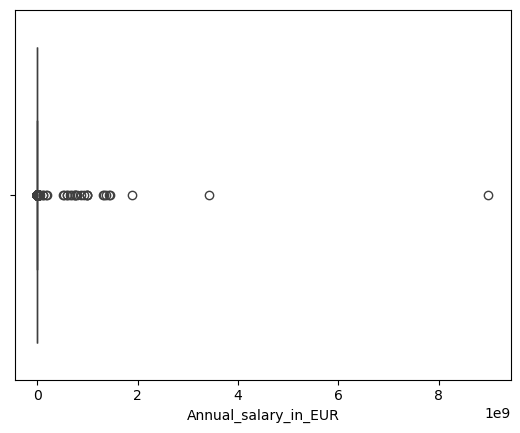

In [935]:
# Visualising outliers with Box plot
sns.boxplot(data=clean_reduced_df, x="Annual_salary_in_EUR")

In [780]:
# Identifying outliers in Annual_salary_EUR Using the Interquartile Range (IQR) method
Q1 = clean_reduced_df["Annual_salary_in_EUR"].quantile(0.25)
Q3 = clean_reduced_df["Annual_salary_in_EUR"].quantile(0.75)

IQR = Q3-Q1

lower = Q1-1.5*IQR
upper = Q3+1.5*IQR

In [781]:
# Creating arrays of Boolean values indicating the outlier rows
upper_array=np.where(clean_reduced_df["Annual_salary_in_EUR"]>=upper)[0]
lower_array=np.where(clean_reduced_df["Annual_salary_in_EUR"]<=lower)[0]  

In [782]:
upper_array

array([   32,   175,   187, ..., 28055, 28061, 28084], dtype=int64)

In [783]:
lower_array

array([], dtype=int64)

In [784]:
# Not removing the outliers because I am not sure if they are to be removed, based on the type of jobs these could be annual salaries

FEATURE SELECTION

In [786]:
clean_reduced_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28085 entries, 0 to 28084
Data columns (total 11 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Industry                           28085 non-null  object 
 1   Job_title                          28085 non-null  object 
 2   Annual_salary                      28085 non-null  float64
 3   Currency                           28085 non-null  object 
 4   Country_of_work                    28085 non-null  object 
 5   Years_of_experience_in_your_field  28085 non-null  object 
 6   Level_of_education                 28085 non-null  object 
 7   Average_age                        28085 non-null  float64
 8   Gender_category                    28085 non-null  object 
 9   Average_Years_of_experience        28085 non-null  float64
 10  Annual_salary_in_EUR               28085 non-null  float64
dtypes: float64(4), object(7)
memory usage: 2.6+ MB


In [787]:
# Creating a new dataframe beacuse chi2 works only with categorical data
numerical_df=clean_reduced_df[["Annual_salary","Average_age","Average_Years_of_experience","Annual_salary_in_EUR"]].copy()

In [788]:
numerical_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28085 entries, 0 to 28084
Data columns (total 4 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Annual_salary                28085 non-null  float64
 1   Average_age                  28085 non-null  float64
 2   Average_Years_of_experience  28085 non-null  float64
 3   Annual_salary_in_EUR         28085 non-null  float64
dtypes: float64(4)
memory usage: 1.1 MB


In [789]:
numerical_df.head()

,Annual_salary,Average_age,Average_Years_of_experience,Annual_salary_in_EUR
0,55000.0,29.0,6.0,60032.500
1,54600.0,29.0,9.0,45513.468
2,34000.0,29.0,3.0,37111.000
3,62000.0,29.0,9.0,67673.000
4,60000.0,29.0,9.0,65490.000


In [790]:
# Reference: Stack Overflow: https://stackoverflow.com/questions/64671316/convert-numerical-data-to-categorical-in-python
numerical_df['Salary_Binned'] = pd.cut(numerical_df['Annual_salary'],
                                        bins=[0, 35000, 55000, 65000, 2000000], 
                                        labels=["Low", "Medium", "High", "Very High"],
                                        right=True)

In [791]:
# Binning the 'Average_Years_of_experience' into categories
numerical_df['Experience_Binned'] = pd.cut(numerical_df['Average_Years_of_experience'],
                                           bins=[0, 3, 6, 41], 
                                           labels=["Low", "Medium", "High"],
                                           right=True)

In [792]:
print(numerical_df)

       Annual_salary  Average_age  Average_Years_of_experience  \
0            55000.0         29.0                          6.0   
1            54600.0         29.0                          9.0   
2            34000.0         29.0                          3.0   
3            62000.0         29.0                          9.0   
4            60000.0         29.0                          9.0   
...              ...          ...                          ...   
28080       117000.0         49.0                         15.0   
28081        70000.0         49.0                         25.0   
28082        28600.0         59.0                         25.0   
28083        56160.0         21.0                          1.0   
28084      2000000.0          0.0                         41.0   

       Annual_salary_in_EUR Salary_Binned Experience_Binned  
0                 60032.500        Medium            Medium  
1                 45513.468        Medium              High  
2                 371

In [793]:
print(numerical_df.isna().sum())

Annual_salary                   0
Average_age                     0
Average_Years_of_experience     0
Annual_salary_in_EUR            0
Salary_Binned                  60
Experience_Binned               0
dtype: int64


In [794]:
# Selecting all of the observations and features
X = numerical_df.iloc[ : ,0:3]
y = numerical_df.iloc[ : ,-1]

In [795]:
# Using chi2 statistical test for non-negative features to select top 3 best features
bestfeatures = SelectKBest(score_func=chi2, k=3)
fit = bestfeatures.fit(X,y)
numerical_dfscores=pd.DataFrame(fit.scores_)
numerical_dfcolumns=pd.DataFrame(X.columns)

In [796]:
featureScores=pd.concat([numerical_dfcolumns,numerical_dfscores],axis=1)
featureScores.columns=["Specs","Score"] # Naming the dataframe columns
print(featureScores.nlargest(3,"Score")) # print 3 best features

                         Specs         Score
0                Annual_salary  2.205346e+10
2  Average_Years_of_experience  6.459227e+04
1                  Average_age  1.621351e+04


In [797]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

In [798]:
model=ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_)

[0.00143239 0.11630963 0.88225798]


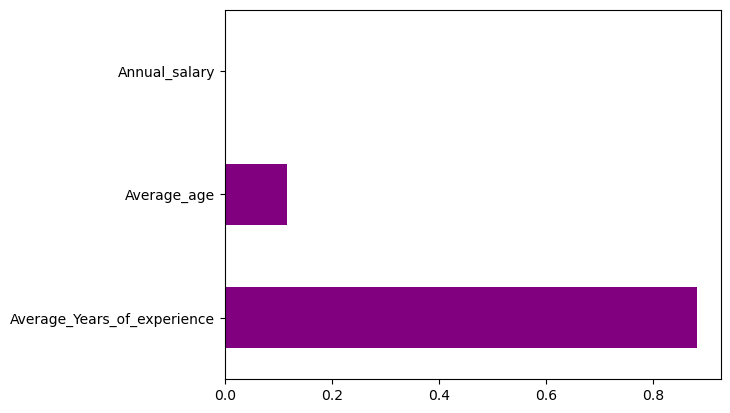

In [799]:
feat_importances=pd.Series(model.feature_importances_,index=X.columns)
color = ['purple']
feat_importances.nlargest(10).plot(kind='barh', color=color)
plt.show()

DATA VISUALIZATION

In [801]:
# Preparation of data visualization for the Poster

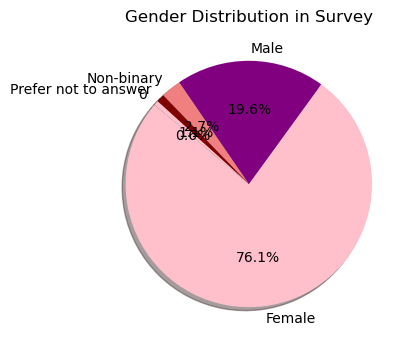

In [802]:
# Creating a pie chart with gender counts using matplotlib
# Reference: Geeks for geeks: https://www.geeksforgeeks.org/plot-a-pie-chart-in-python-using-matplotlib/ 04 October 2024
# Reference: Python Tutorials: https://pythonspot.com/matplotlib-pie-chart/ 2023 Pythonspot
gender_counts = clean_reduced_df['Gender_category'].value_counts()

# Define colors for each gender category
colors = ['pink', 'purple', 'lightcoral', 'maroon']

# Plotting the pie chart
plt.figure(figsize=(6, 4))
plt.pie(gender_counts, labels=gender_counts.index,colors=colors, shadow=True, autopct='%1.1f%%', startangle=140)
plt.title('Gender Distribution in Survey')
plt.show()

In [803]:
# Visualizing Top 5 highest salaries and occupations and comparing it with years of experience
# Reference: Geeks for geeks: https://www.geeksforgeeks.org/get-n-largest-values-from-a-particular-column-in-pandas-dataframe/ 18 Dec 2018
top_5_salaries = clean_reduced_df.nlargest(5, 'Annual_salary_in_EUR')

In [804]:
print(top_5_salaries)

                            Industry                   Job_title  \
28055  Accounting, Banking & Finance  Investment Banking Analyst   
24443                  Entertainment                 Voice Actor   
10654                         Retail          Compliance Manager   
18027              Computing or Tech          Backend system dev   
25001              Computing or Tech            Managing Partner   

       Annual_salary Currency Country_of_work  \
28055   6.000070e+09      CAD          Canada   
24443   2.080000e+07      JPY           Japan   
10654   1.150000e+07      JPY           Japan   
18027   8.800000e+06      JPY           Japan   
25001   8.640000e+06      JPY           Japan   

      Years_of_experience_in_your_field                  Level_of_education  \
28055                    1 year or less                      College degree   
24443                      8 - 10 years                      College degree   
10654                      8 - 10 years  Professional degre

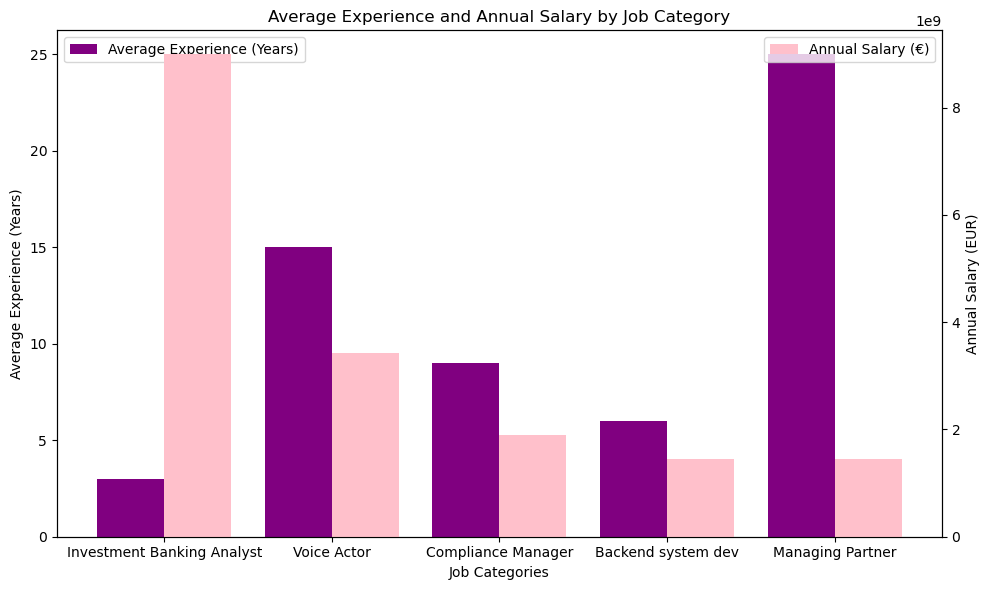

In [805]:
# Data Visualization of Top 5 annual highest earning salaries, based on occupation and compared with years of experience using matplotlib
# Reference; Geeks for geeks; https://www.geeksforgeeks.org/bar-plot-in-matplotlib/ 12 August 2024
# https://www.geeksforgeeks.org/matplotlib-pyplot-legend-in-python/ 01 August 2024
# Stack overflow: https://stackoverflow.com/questions/19125722/adding-a-matplotlib-legend#comment83694442_19125863 20 January 2018

# Categorising top 5 highest earning occupations, average experience years and annual salary in euros
categories = ['Investment Banking Analyst', 'Voice Actor', 'Compliance Manager', 'Backend system dev', 'Managing Partner']
average_experience_years = [3.0, 15.0, 9.0, 6.0, 25.0]  # in years
annual_salary = [8.993505e+09, 3.420560e+09, 1.891175e+09, 1.447160e+09, 1.447160e+09]  # in euros

# Creating a figure and axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Creating bar plots for average experience years
bar_width = 0.4
x = np.arange(len(categories))
ax1.bar(x - bar_width/2, average_experience_years, width=bar_width, label='Average Experience (Years)', color='purple')

# Creating a secondary axis for annual salary in EUR
ax2 = ax1.twinx()
ax2.bar(x + bar_width/2, annual_salary, width=bar_width, label='Annual Salary (€)', color='pink')

# Adding titles and labels
ax1.set_xlabel('Job Categories')
ax1.set_ylabel('Average Experience (Years)', color='black')
ax2.set_ylabel('Annual Salary (EUR)', color='black')
ax1.set_title('Average Experience and Annual Salary by Job Category')
ax1.set_xticks(x)
ax1.set_xticklabels(categories)

# Add legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()